# Second price auction



In [4]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

In [6]:
n = 10000
b = np.linspace(0,100,n)

## Optimal bidding without budget constraint

We assume here:
- no correlation between the bids in the market and the probability of a click,
- and no budget constraint

- $\pi_{i}$ the expected profit of the bidder for auction $i$ in case of a first price auction
- $\sigma_{i}$ the expected profit of the bidder for auction $i$ in case of a second price auction
- $\pi$ the expected profit over the campaign in case of a first price auction
- $\sigma$ the expected profit over the campaign  in case of a second price auction
- $B$ the budget constraint for the campaign
- $f_i(b)$ the PDF of first bid except me
- $F_i(b)$ the CDF of first bid except me
- $c_i$ the click probability
- $p_i$ the click price

The expected profit $\pi_i$ of the bidder for auction $i$ can be written.
$$\pi_i(b_i) = F_i(b_i)\left(c_ip_i - b_i\right)$$
The FOC is:
$$f_i(b_i)\left(c_ip_i - b_i\right) = F_i(b_i) \Longleftrightarrow b_i + \frac{F_i(b_i)}{f_i(b_i)} = c_ip_i = G(b_i)$$
$$\Longleftrightarrow b_i = G^{-1}(c_ip_i)$$

The expected profit $\sigma_i$ of the bidder for auction $i$ can be written.
$$\sigma_i(b_i) = \int_0^{b_i}\left(c_ip_i - b\right)f_i(b)db$$
The FOC is:
$$f_i(b_i)\left(c_ip_i - b_i\right) = 0 \Longleftrightarrow b_i = c_ip_i$$

The expected second bid given a winning $b_i$ can be computed as:
$$\frac{\int_0^{b_i}bf_i(b)db}{F_i(b_i)} = b_i-\frac{\int_0^{b_i}F_i(b)db}{F_i(b_i)}$$

In a first price auction:
$$b + \frac{F(b)}{f(b)} - v = 0$$
Let's look at $b$ as a function of $v$
$$H(b,v) = b + \frac{F(b)}{f(b)} - v = 0$$
$$\frac{\partial}{\partial b}H(b,v) = 2 - \frac{F(b)f(b)^\prime}{f(b)^2}$$
$$\frac{\partial}{\partial v}H(b,v) = -1$$
$$\frac{db}{dv} = \frac{1}{2 - \frac{F(b)f(b)^\prime}{f(b)^2}} = \frac{1}{2f(b)^2 - \frac{F(b)f(b)^\prime}{f(b)^2}}$$


In [3]:
n = 10000
b = np.linspace(0,100,n)

N = lognorm(scale=50, s=0.1)
F = N.cdf(b)
f = N.pdf(b)
plt.plot(b,F)
plt.plot(b,f)
plt.show()

plt.xlim(0,100)
plt.plot(b, b)
plt.plot(b+F/f, b)
#plt.plot(b, b-np.cumsum(F)*(b[1]-b[0])/F)
plt.show()

N = lognorm(scale=50, s=3)
F = N.cdf(b)
f = N.pdf(b)
plt.plot(b,F)
plt.plot(b,f)
plt.show()

plt.xlim(0,100)
plt.plot(b, b)
plt.plot(b+F/f, b)
#plt.plot(b, b-np.cumsum(F)*(b[1]-b[0])/F)
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide


## Optimal bidding with budget constraint

When adding the budget constraint, one gets the following maximization problems:
$$\pi = \sum_i\pi_i(b_i)$$ under constraint $$\sum_ib_iF_i(b_i)<B$$
and:
$$\sigma = \sum_i\sigma_i(b_i)$$ under constraint $$\sum_i\int_0^{b_i}bf_i(b)db<B$$
KKT gives:
$$\forall i\; \pi_i^{\prime}(b_i) = \lambda \left(b_if_i(b_i)+F_i(b_i)\right)$$
$$\forall i\; f_i(b_i)c_ip_i = b_if_i(b_i)+F_i(b_i)+\lambda \left(b_if_i(b_i)+F_i(b_i)\right) \Longleftrightarrow \forall i\; G(b_i) = \frac{c_ip_i}{1+\lambda}$$
$$\Longleftrightarrow b_i = G^{-1}\left(\frac{c_ip_i}{1+\lambda}\right)$$
and:
$$\forall i\; \sigma_i^{\prime}(b_i) = \lambda \left(b_if_i(b_i)\right)$$
$$\forall i\; f_i(b_i)c_ip_i = b_if_i(b_i)+\lambda b_if_i(b_i) \Longleftrightarrow \forall i\; b_i = \frac{c_ip_i}{1+\lambda}$$

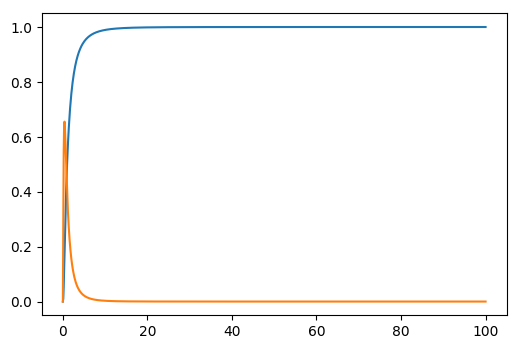

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide


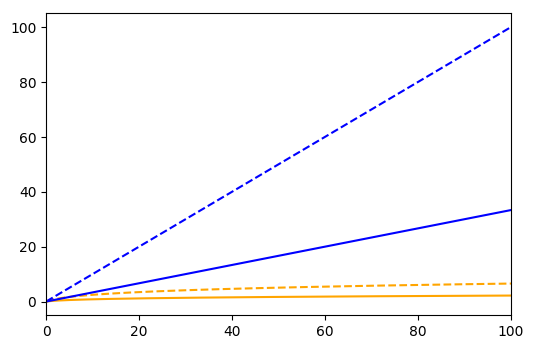

In [7]:
n = 1000
l = 2
b = np.linspace(0,100,n)
N = lognorm(scale=1, s=1)
F = N.cdf(b)
f = N.pdf(b)
plt.plot(b,F)
plt.plot(b,f)
plt.show()

plt.xlim(0,100)
plt.plot(b+F/f, b, linestyle='--', color='orange')
plt.plot(b, b, linestyle='--', color='blue')
plt.plot(b+F/f, b/(1+l), color='orange')
plt.plot(b, b/(1+l), color='blue')
plt.show()